# Blood Glucose Control - EDA

**Name:** Lino Kee



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD. 

In [33]:
import pandas as pd
import numpy as np
import os as os
import glob
from pathlib import Path
from datetime import datetime


# List to store dataframes
df = []

# Define the path to the data dictionary
data_folder = Path("../data")

# Loop throughout the CSV files in the data folder
for csv_file in data_folder.glob("gluroo_*.csv"):
    unique_id = csv_file.stem.split('_')[1]

    # Read the CSV file into a dataframe
    patient_data = pd.read_csv(csv_file)

    # Add a new column for patient ID
    patient_data["unique_id"] = unique_id

    # Append the dataframe to the list
    df.append(patient_data)

# Concatenate all dataframes into a single dataframe
joint_df = pd.concat(df, ignore_index = True)

# Convert 'date' to datetime
joint_df['date'] = pd.to_datetime(joint_df['date'], errors='coerce')

# Display the first few rows of the combined data set
combined_df.head()



/tmp/ipykernel_53623/225316199.py:32: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce')


,date,sender_id,bgl,bgl_date_millis,text,template,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index,dose_automatic,fp_bgl,message_basal_change,__typename,trend,unique_id
0,2024-05-01 00:00:27.029000-05:00,NaN,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
1,2024-05-01 00:05:27.183000-05:00,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
2,2024-05-01 00:10:26.949000-05:00,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
3,2024-05-01 00:15:27.180000-05:00,NaN,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
4,2024-05-01 00:20:27.021000-05:00,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030


### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet. 

### Visualization 1: Time Series Plot of Hourly Blood Glucose Levels (BGL) With Annotated Peaks and Troughs

My first visualisation demonstrates daily fluctuations in blood glucose levels. It can tell us whether levels are generally rising or falling during specific periods. Peaks indicate moments of high blood glucose levels, which can indicate hyperglycemia, while troughs indicate moments of low blood glucose, which can indicate hypoglycemia. These moments are important in reminding us how to manage insulin levels and dietary consumption. 

Another helpful insight that peaks and troughs can provide are correlations with specific activities, meals, or medications. For example, it is expected that a peak after a meal may occur, while a trough may suggest the need for a snack intake or additional insulin. Variation between peaks and troughs tell us how variable glucose levles are. High variability may be negative as it could suggest health risks, which can complicate diabetes management.

The plot can also reveal time-of-day effects, showing whether glucose levels are higher in the morning vs. evening or if there are fluctuations associated with routines. Analyses of such plots can help us identify trends and changes in glucose control, which can useful in determining the efficacy of various diabetes treatment plans.

For individuals, who have diabetes, visualizing blood glucose levels can help them make better decisions about their diet, exercise, and medication based on these patterns. 

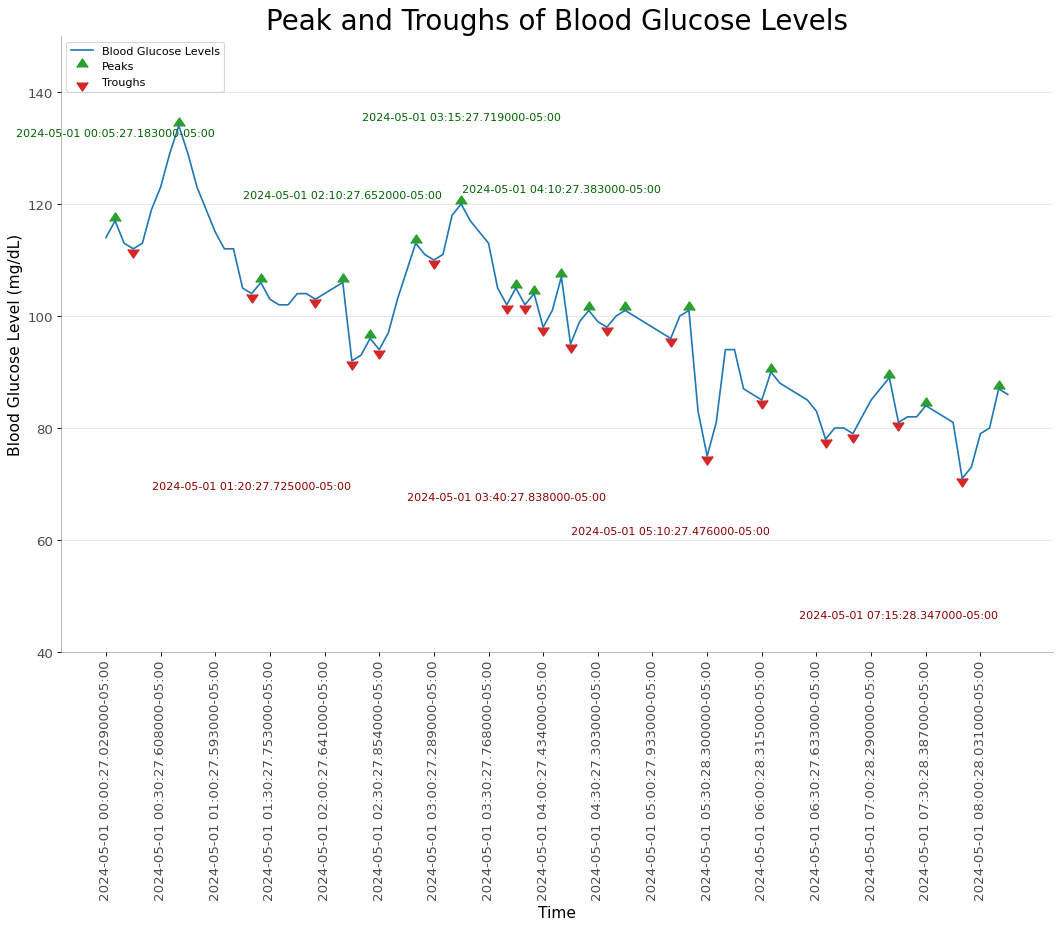

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Only get the first 100 data points
limited_df = joint_df.head(100)

# Get the Peaks and Troughs
data = limited_df['bgl'].values
doublediff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1*data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# Draw Plot
plt.figure(figsize=(16, 10), dpi = 80)
plt.plot('date', 'bgl', data=limited_df, color='tab:blue', label='Blood Glucose Levels')
plt.scatter(limited_df.date[peak_locations], limited_df.bgl[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(limited_df.date[trough_locations], limited_df.bgl[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')

# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(limited_df.date[p], limited_df.bgl[p]+15, limited_df.date[p], horizontalalignment='center', color='darkgreen')
    plt.text(limited_df.date[t], limited_df.bgl[t]-35, limited_df.date[t], horizontalalignment='center', color='darkred')

# Add labels
plt.xlabel('Time', fontsize=14)  # Label for the x-axis
plt.ylabel('Blood Glucose Level (mg/dL)', fontsize=14)  # Label for the y-axis

# Decoration
plt.ylim(40, 150)
xtick_location = limited_df.index.tolist()[::6]
xtick_labels= limited_df.date.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.title("Peak and Troughs of Blood Glucose Levels", fontsize=25)
plt.yticks(fontsize=12, alpha=.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()



In this visualization, we can se the combined results in blood glucose fluctuations for both patients. It appears that there's greater fluctuations in the peaks and troughs of blood glucose during mealtimes due to consumption of sugars. Data was combined for both patients to gain insights on shared trends. We can also observe fluctuations during times when there is insulin consumption. However, this visualization only involves plotting data for one day: May. 1st, 2024. Future visualizations should involve plotting data over a longer period of time to determine weekly, monthly, or seasonal trends in blood glucose fluctuations. 

### Visualization 2: Unstacked Area Chart

My second visualization is an unstacked area chart correlating blood glucose levels with insulin dosage. This chart provides insights on the relationships between these two variables over time. Similar to the previous visualization, the chart allows one to observe how blood glucose levels and insulin dosages change throughout the day by observing trends in the peaks and troughs. For example, we can observe how higher insulin doses might correlate with lower blood glucose levels.

The area under each line can indicate the variability in blood glucose levels and insulin dosages, which can help us to determine periods of stability versus fluctuations. We can gain insight on how effective insulin therapy is and whether it is a good idea to increase or decrese the dose. 

From a patient's perspective, this visualization is valuable as it allows them to see how sudden spikes in blood glucose alongside low insulin dosages might affect the effectiveness of the treatment. It can also help them to determine other factors that may impact blood glucose control. 


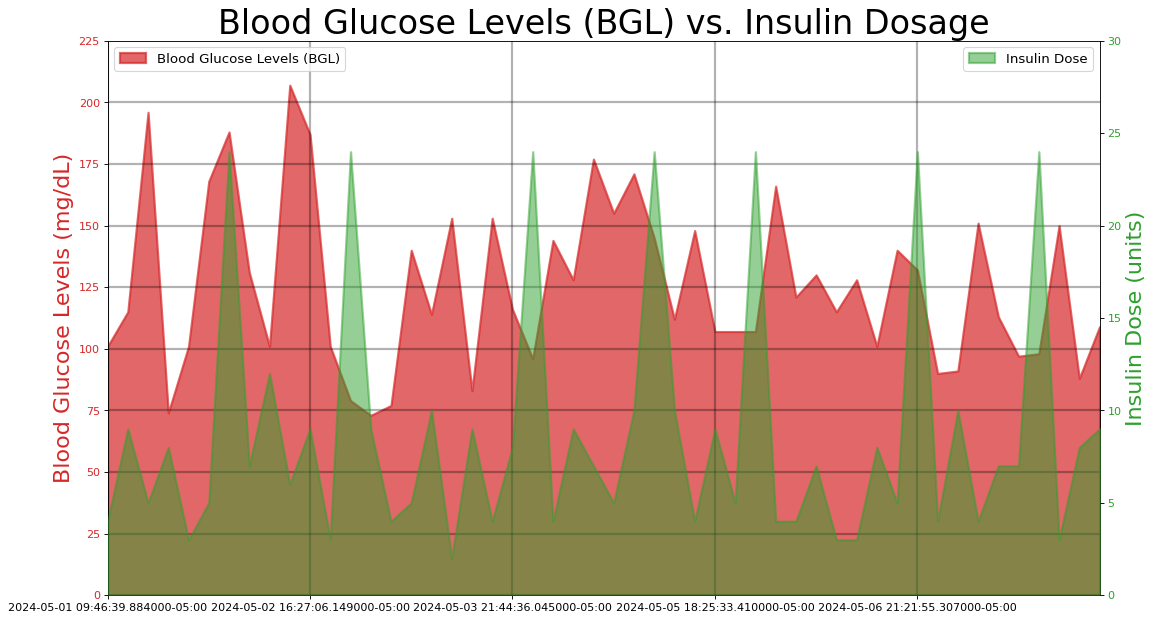

In [21]:
# Extract insulin dose information
patient_id = joint_df["unique_id"].iloc[0]
patient_df = joint_df[joint_df["unique_id"] == patient_id]

#Filter out rows with NaN values in 'dose_units'
filtered_df = joint_df.dropna(subset=['dose_units'])

# Show the first 100 rows
limited_df = filtered_df.head(50)

# Prepare Data
x = limited_df['date'].values.tolist()
y1 = limited_df['bgl'].values.tolist()
y2 = limited_df['dose_units'].values.tolist()
mycolors = ['tab:red', 'tab:green']      
columns = ['Blood Glucose Levels (BGL)', 'Insulin Dose']

# Draw Plot 
fig, ax1 = plt.subplots(1, 1, figsize=(16,9), dpi= 80)

# Primary y-axis for Blood Glucose Levels
ax1.fill_between(x, y1=y1, y2=0, label='Blood Glucose Levels (BGL)', alpha=0.7, color=mycolors[0], linewidth=2)
ax1.set_ylabel('Blood Glucose Levels (mg/dL)', fontsize=20, color=mycolors[0])
ax1.tick_params(axis='y', labelcolor=mycolors[0])

# Secondary y-axis for Insulin Dose
ax2 = ax1.twinx()
ax2.fill_between(x, y1=y2, y2=0, label='Insulin Dose', alpha=0.5, color=mycolors[1], linewidth=2)
ax2.set_ylabel('Insulin Dose (units)', fontsize=20, color=mycolors[1])
ax2.tick_params(axis='y', labelcolor=mycolors[1])

# Decorations
ax1.set_title('Blood Glucose Levels (BGL) vs. Insulin Dosage', fontsize=30)
ax1.set_ylim(0, 225)
ax2.set_ylim(0, 30)

# Legends 
ax1.legend(loc='upper left', fontsize =12)
ax2.legend(loc='upper right', fontsize=12)


plt.xticks(x[::10], fontsize=15, horizontalalignment='center')
plt.xlim(x[0], x[-1])

# Draw Tick lines for y1 (BGL)
for y in np.arange(0, 225, 25):
    ax1.hlines(y, xmin=0, xmax=len(x), colors='black', alpha=0.3, linestyles="-", lw=2)

# Draw Vertical Tick Lines
for date in x[::10]:  # Adjust this step as needed for the vertical lines
    ax1.vlines(date, ymin=0, ymax=225, colors='black', alpha=0.3, linestyles="-", lw=2)

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.show()

From this visualisation, we can observe a somewhat inverse relationship between blood glucose levels and insulin dosage. It appears that whenever a patient consumes a minimal dose of insulin, their blood glucose levels spike up. However, larger insulin dosages cause a significant reduction in blood glucose levels. This indicates that a large enough dose is required to effectively manage blood glucose levels. Future visualizations and studies should further explore the insulin dosage threshold required to ensure consistent management of blood glucose levels. 

### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.* 

1. How can we accurately and reliably identify specific times of the day when blood glucose levels peak and trough, and which patterns result from these fluctuations. How could we determine which factors, such as physical activity, insulin intake, sleep duration, stress, and hormonal activity, play a stronger role creating these fluctuations? Which measurement methods can provide the most consistently accurate correlations between these factors? Are there variation seasonal or monthly trends, and how could we use historical data to predict future trends?
2. What cultural and socioeconomic factors might influence blood glucose levels present in patients with Type 1 Diabetes? In what ways could climate and temperature affect an individual's predisposition to diabetes, both internally and externally? To what extent do genetic and environmental factors contribute to fluctuations in blood glucose levels and the body's responsiveness to insulin intake? 

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future. 

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`